In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "clickadd"

In [3]:
df=read.csv('../input/clickadd/Web_data.csv',na.strings=c(""," ","NA","NULL"))
head(df)

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
,<int>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
2,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
3,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
4,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
5,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
6,1475237,35.98,38,60813.00,125.20,product_10,Guernsey,City_2,Yes,Early-Morning,Saturday,July,2020,1


In [4]:
head(df)
str(df)
summary(df)

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
,<int>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
2,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
3,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
4,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
5,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
6,1475237,35.98,38,60813.00,125.20,product_10,Guernsey,City_2,Yes,Early-Morning,Saturday,July,2020,1


'data.frame':	6657 obs. of  14 variables:
 $ VistID        : int  5183153 4023265 4708083 9771815 6451317 1475237 5578680 4037672 5792642 9377192 ...
 $ Time_Spent    : num  88 51.6 82.4 62.1 77.7 ...
 $ Age           : int  43 50 38 45 31 38 26 23 22 50 ...
 $ Avg_Income    : num  55901 39132 57032 48868 61608 ...
 $ Internet_Usage: num  185 177 211 190 205 ...
 $ Ad_Topic      : Factor w/ 30 levels "product_1","product_10",..: 3 29 27 11 3 2 1 29 22 10 ...
 $ Country_Name  : Factor w/ 237 levels "Afghanistan",..: 189 218 158 196 84 87 7 205 156 157 ...
 $ City_code     : Factor w/ 9 levels "City_1","City_2",..: 5 1 2 3 2 2 2 4 3 4 ...
 $ Male          : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 1 1 1 ...
 $ Time_Period   : Factor w/ 6 levels "Early-Morning",..: 3 2 4 4 6 1 1 6 3 1 ...
 $ Weekday       : Factor w/ 7 levels "Friday","Monday",..: 5 3 6 5 5 3 6 4 6 1 ...
 $ Month         : Factor w/ 7 levels "April","February",..: 4 5 3 1 3 4 3 4 1 1 ...
 $ Year          : int  2020 2

     VistID          Time_Spent         Age          Avg_Income   
 Min.   :1000187   Min.   :32.60   Min.   :19.00   Min.   :13996  
 1st Qu.:3307428   1st Qu.:55.20   1st Qu.:28.00   1st Qu.:48454  
 Median :5523907   Median :70.66   Median :36.00   Median :58183  
 Mean   :5542115   Mean   :66.85   Mean   :37.26   Mean   :55930  
 3rd Qu.:7823942   3rd Qu.:79.57   3rd Qu.:46.00   3rd Qu.:65957  
 Max.   :9999708   Max.   :91.43   Max.   :61.00   Max.   :79485  
                                                                  
 Internet_Usage        Ad_Topic              Country_Name    City_code   
 Min.   :104.8   product_22: 266   Canada          :  46   City_1 :2559  
 1st Qu.:145.7   product_25: 255   Saudi Arabia    :  44   City_2 :1675  
 Median :193.6   product_27: 250   Eritrea         :  43   City_3 :1075  
 Mean   :184.9   product_13: 247   Venezuela       :  43   City_4 : 673  
 3rd Qu.:222.3   product_6 : 244   Benin           :  42   City_5 : 364  
 Max.   :270.0   pro

In [5]:
FunctionUniqueCount=function(inpCol){
    return(length(unique(inpCol)))
}

In [6]:
sapply(df, FunctionUniqueCount)

VistID     Time_Spent            Age     Avg_Income Internet_Usage 
          6657            900             43           1487            966 
      Ad_Topic   Country_Name      City_code           Male    Time_Period 
            30            237              9              2              6 
       Weekday          Month           Year        Clicked 
             7              7              1              2

In [7]:
CategoricalCols=c('Age','Ad_Topic','City_code','Male','Time_Period','Weekday','Month')
ContinuousCols =c('Time_Spent','Avg_Income','Internet_Usage')
Targetvariable=c('Clicked')

In [8]:
UselessColumns=c('VistID','Year')
df[ , UselessColumns]=NULL
head(df)

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Clicked
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,0
2,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,1
3,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,0
4,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,1
5,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,0
6,35.98,38,60813.00,125.20,product_10,Guernsey,City_2,Yes,Early-Morning,Saturday,July,1


Warning message in brewer.pal(2, "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in brewer.pal(2, "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in brewer.pal(2, "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


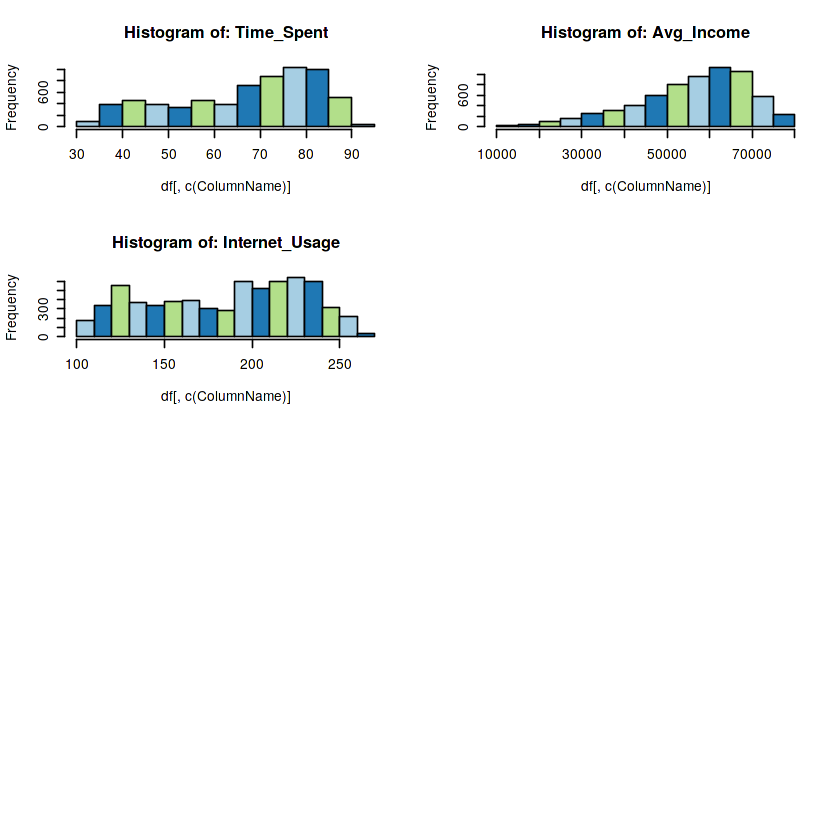

In [9]:
par(mfrow=c(4,2))
library(RColorBrewer)
for (ColumnName in ContinuousCols){
hist(df[,c(ColumnName)], main=paste('Histogram of:', ColumnName), 
col=brewer.pal(2,"Paired"))
}

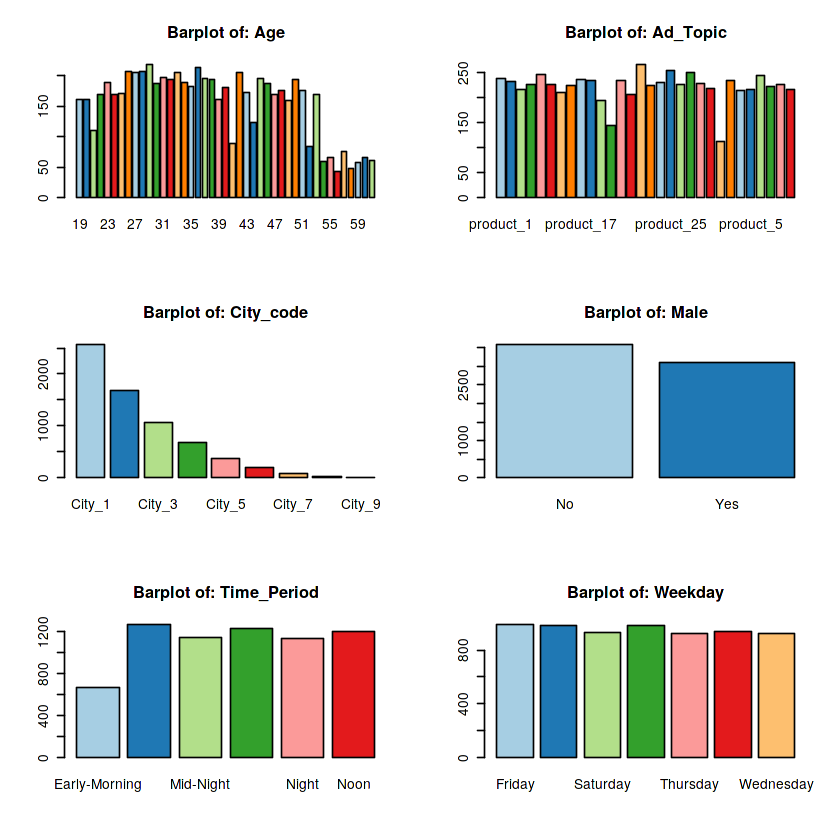

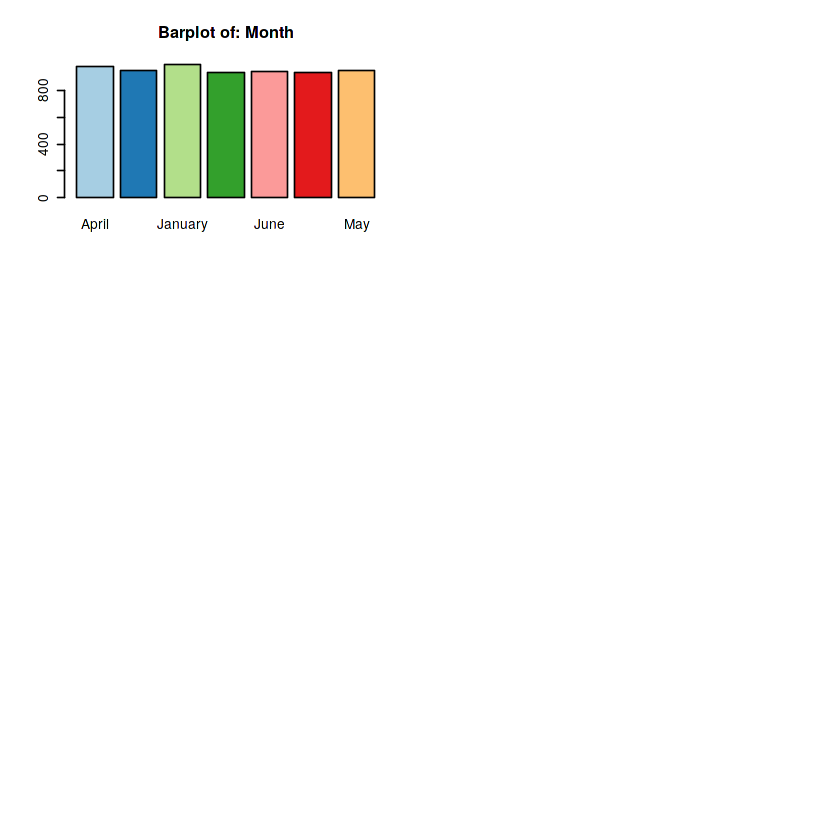

In [10]:
par(mfrow=c(3,2))
library(RColorBrewer)
for (ColumnName in CategoricalCols){
barplot(table(df[,c(ColumnName)]), main=paste('Barplot of:', ColumnName), 
col=brewer.pal(8,"Paired"))
}

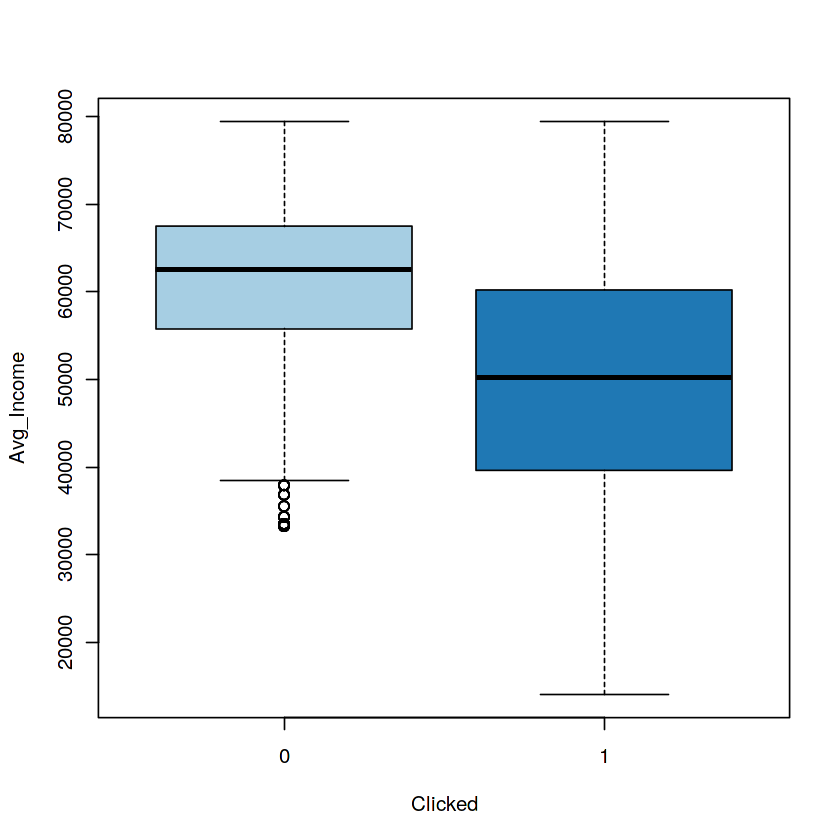

In [11]:
boxplot(Avg_Income~Clicked, data = df, col=brewer.pal(8,"Paired"))

In [12]:
colSums(is.na(df))

Time_Spent            Age     Avg_Income Internet_Usage       Ad_Topic 
             0              0              0              0              0 
  Country_Name      City_code           Male    Time_Period        Weekday 
             0              0              0              0              0 
         Month        Clicked 
             0              0

with respect to Avg Imcome and  with all categorical variables distribution of target variable

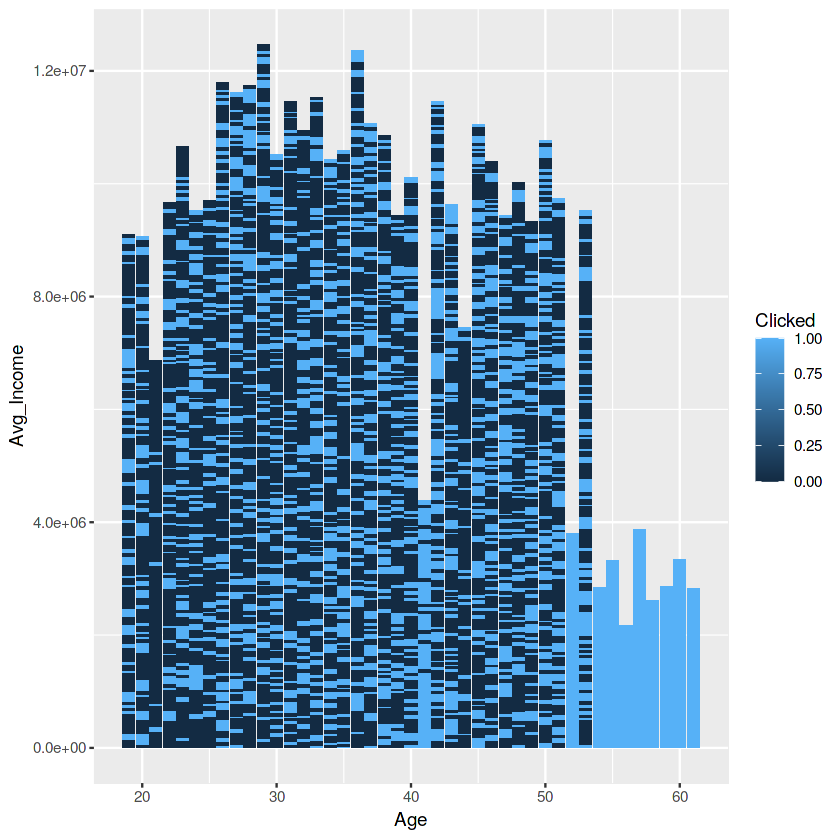

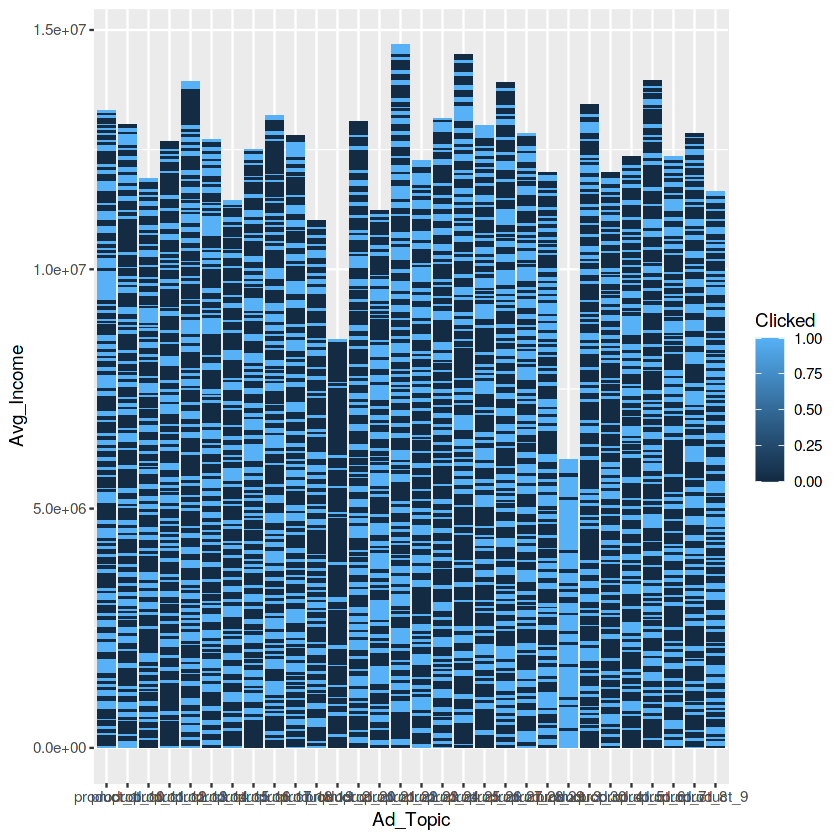

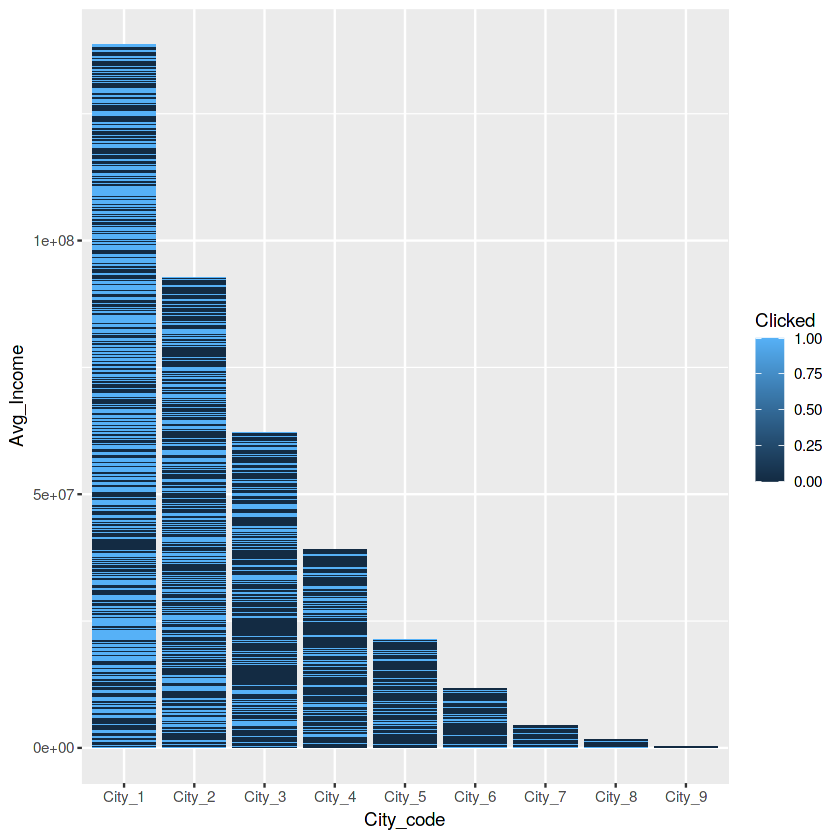

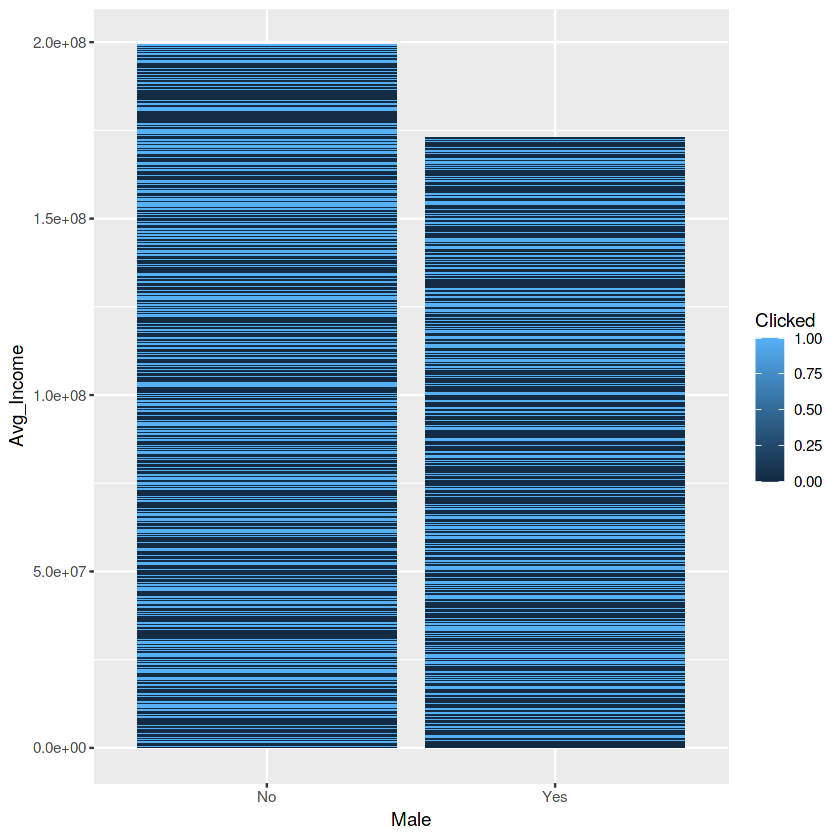

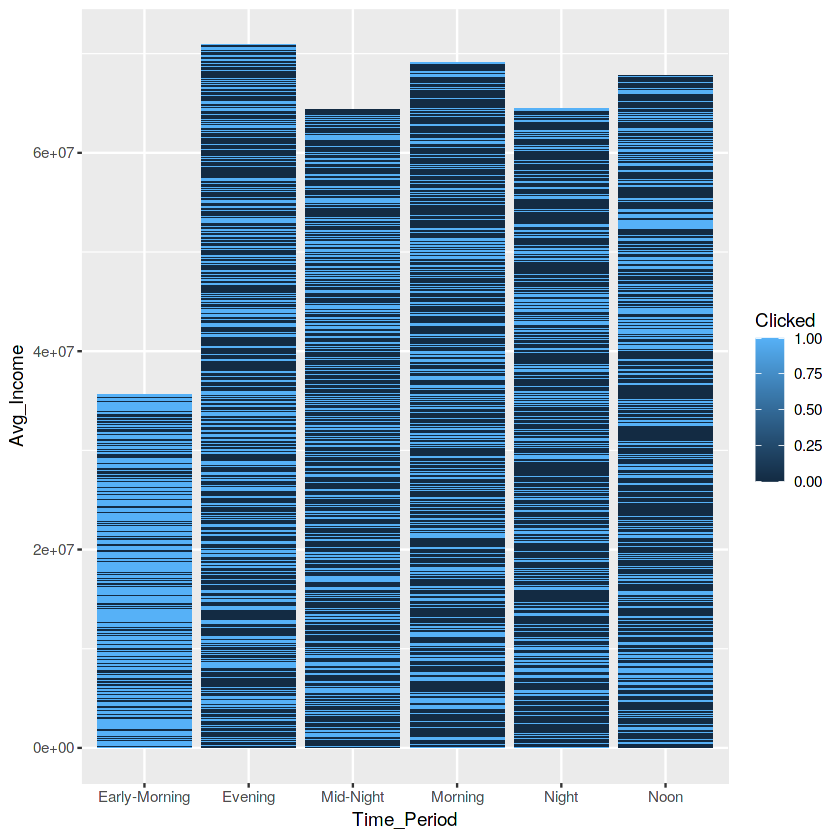

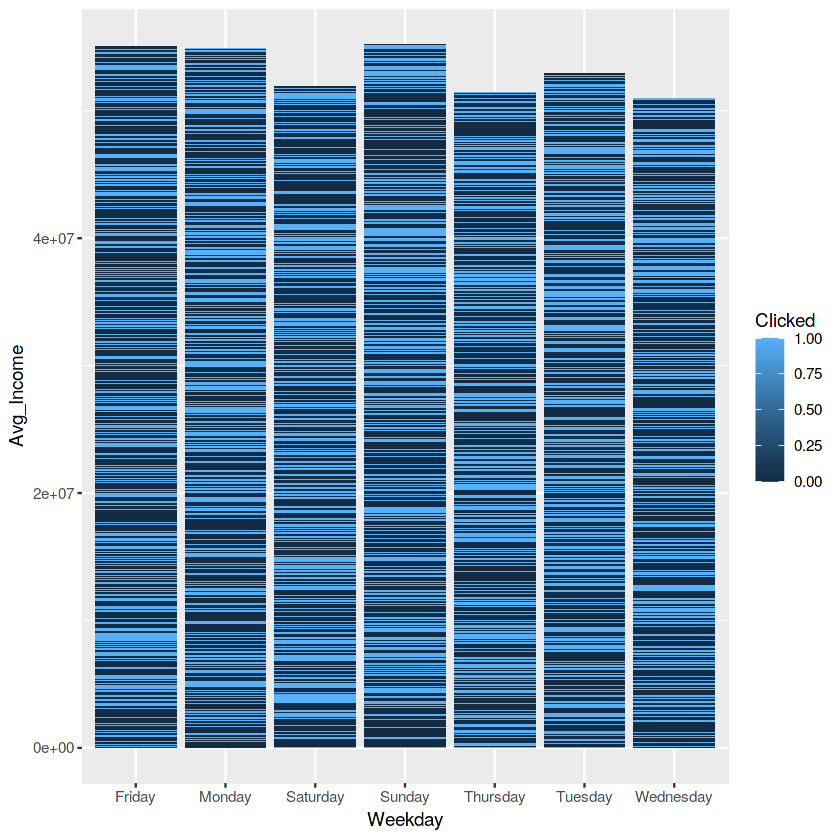

In [13]:
library(ggplot2)

 ggplot(df, aes(fill=Clicked, y=Avg_Income, x=Age)) + geom_bar(position="stack", stat="identity")
 ggplot(df, aes(fill=Clicked, y=Avg_Income, x=Ad_Topic)) + geom_bar(position="stack", stat="identity")
 ggplot(df, aes(fill=Clicked, y=Avg_Income, x=City_code)) + geom_bar(position="stack", stat="identity")
 ggplot(df, aes(fill=Clicked, y=Avg_Income, x=Male)) + geom_bar(position="stack", stat="identity")
 ggplot(df, aes(fill=Clicked, y=Avg_Income, x=Time_Period)) + geom_bar(position="stack", stat="identity")
 ggplot(df, aes(fill=Clicked, y=Avg_Income, x=Weekday)) + geom_bar(position="stack", stat="identity")
#p7 <- ggplot(df, aes(fill=Clicked, y=Avg_Income, x=Month)) + geom_bar(position="stack", stat="identity")



with respect to Time Spent and  with all categorical variables distribution of target variable

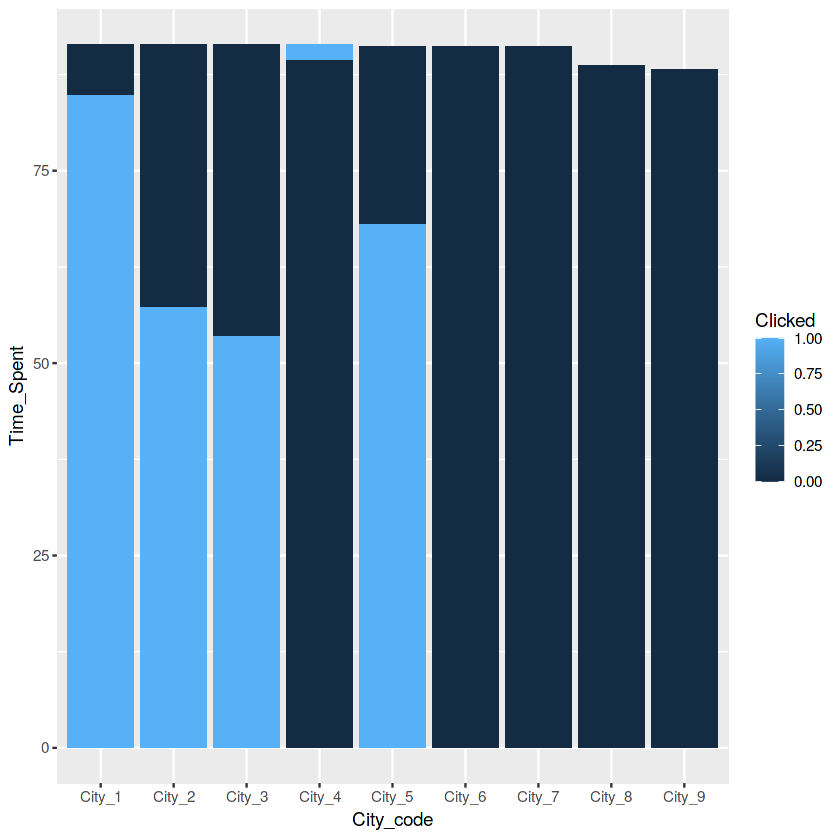

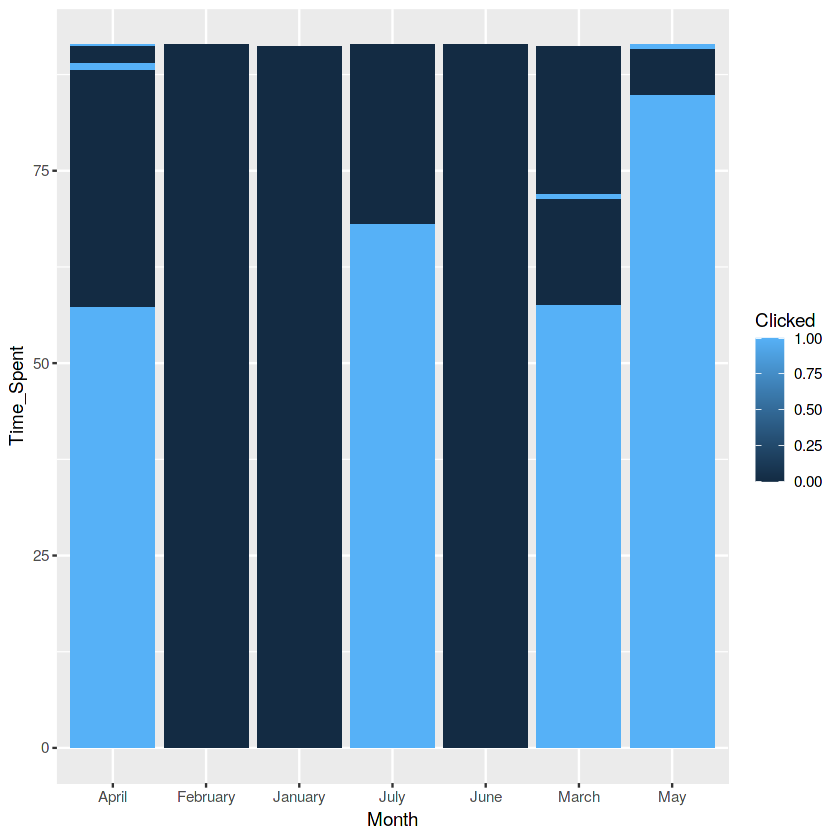

In [15]:
ggplot(df, aes(fill=Clicked, y=Time_Spent, x=City_code)) + geom_bar(position="dodge", stat="identity")
ggplot(df, aes(fill=Clicked, y=Time_Spent, x=Month)) + geom_bar(position="dodge", stat="identity")

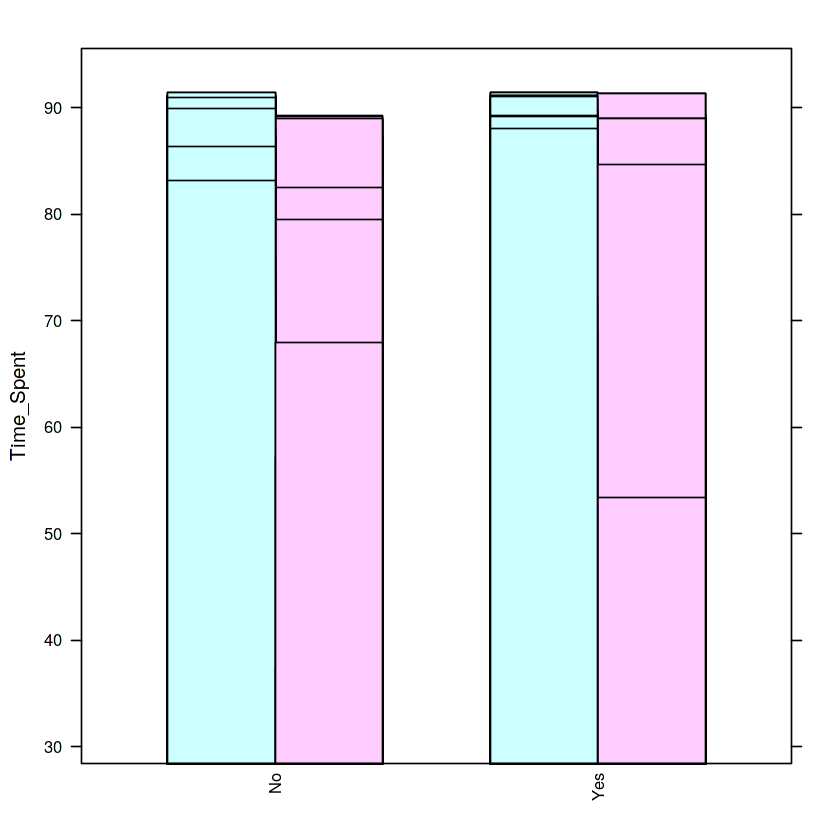

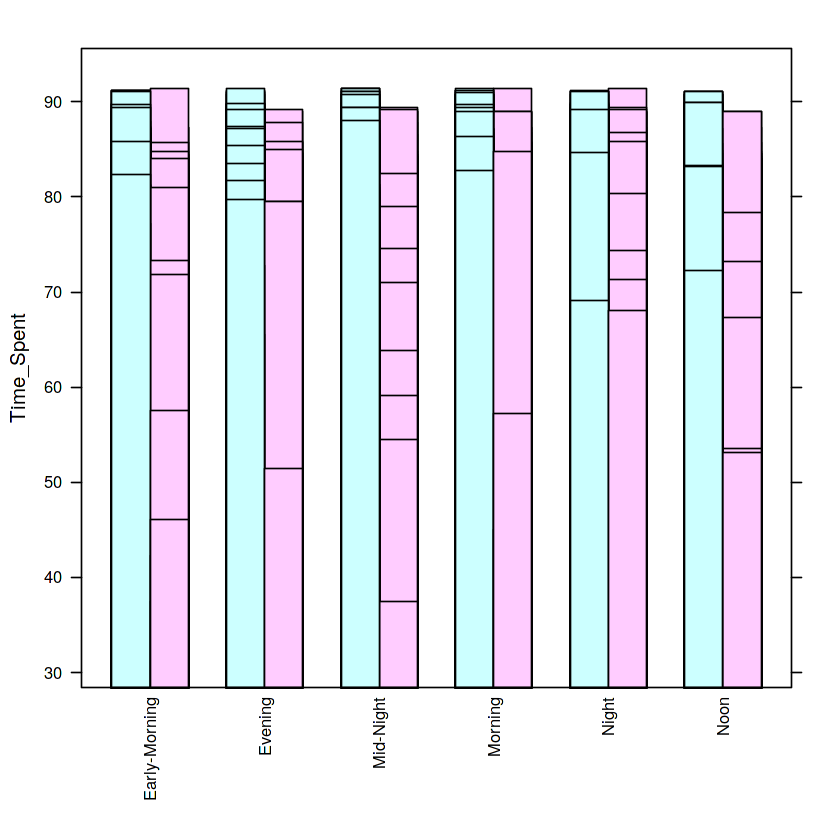

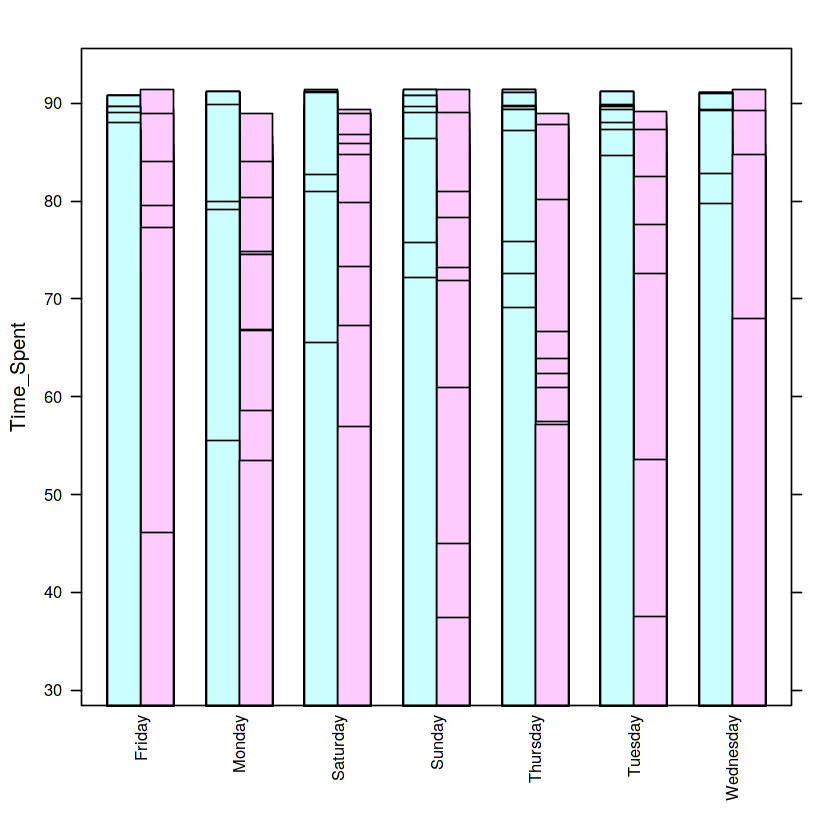

In [16]:
library(lattice)
barchart(Time_Spent~Male,data=df,groups=Clicked, scales=list(x=list(rot=90,cex=0.8)))
barchart(Time_Spent~Time_Period,data=df,groups=Clicked, scales=list(x=list(rot=90,cex=0.8)))
barchart(Time_Spent~Weekday,data=df,groups=Clicked, scales=list(x=list(rot=90,cex=0.8)))

In [17]:
CorrData=cor(df[, ContinuousCols], use = "complete.obs")
CorrData

,Time_Spent,Avg_Income,Internet_Usage
Time_Spent,1.0000000,0.3647374,0.5883601
Avg_Income,0.3647374,1.0000000,0.3839780
Internet_Usage,0.5883601,0.3839780,1.0000000


In [18]:
ColsForANOVA=c('Time_Spent','Avg_Income','Internet_Usage')
for (contCol in ColsForANOVA){
    anovaData= df[, c("Clicked", contCol)]
    print(str(anovaData))
    P_Value=summary(aov(Clicked~., data= anovaData))[[1]][[5]][1]
    print(paste('P-value for the test is:', P_Value))
}

'data.frame':	6657 obs. of  2 variables:
 $ Clicked   : int  0 1 0 1 0 1 1 0 0 1 ...
 $ Time_Spent: num  88 51.6 82.4 62.1 77.7 ...
NULL
[1] "P-value for the test is: 0"
'data.frame':	6657 obs. of  2 variables:
 $ Clicked   : int  0 1 0 1 0 1 1 0 0 1 ...
 $ Avg_Income: num  55901 39132 57032 48868 61608 ...
NULL
[1] "P-value for the test is: 0"
'data.frame':	6657 obs. of  2 variables:
 $ Clicked       : int  0 1 0 1 0 1 1 0 0 1 ...
 $ Internet_Usage: num  185 177 211 190 205 ...
NULL
[1] "P-value for the test is: 0"


In [19]:
ColsForCHI=c('Age','Ad_Topic','City_code','Male','Time_Period','Weekday','Month')
for (catCol in ColsForCHI){
    CrossTabResult=table(df[ , c('Clicked', catCol)])
    #CrossTabResult
    #barplot(CrossTabResult, beside=T, col=c('Red','Green'), legend=T)
    p_value=chisq.test(CrossTabResult)[3]
    print(paste('P-value for the test is:', p_value))
}   

[1] "P-value for the test is: 1.17698529353057e-174"
[1] "P-value for the test is: 1.26765736047366e-24"


Warning message in chisq.test(CrossTabResult):
“Chi-squared approximation may be incorrect”


[1] "P-value for the test is: 2.66679533916976e-88"
[1] "P-value for the test is: 0.0269517130174507"
[1] "P-value for the test is: 4.46574501573588e-47"
[1] "P-value for the test is: 0.722631732625082"
[1] "P-value for the test is: 0.42290490972633"


In [20]:
InputData=df
TargetVariableName='Clicked'
InputData[, c(TargetVariableName)]=as.factor(InputData[, c(TargetVariableName)])
class(InputData[, c(TargetVariableName)])

[1] "factor"

In [21]:
summary(InputData[, c(TargetVariableName)])

0    1 
3619 3038

In [22]:
TargetVariable=InputData[, c(TargetVariableName)]
str(TargetVariable)


 Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 1 2 ...


In [23]:
PredictorVariables=InputData[, !names(InputData) %in% TargetVariableName]
str(PredictorVariables)

'data.frame':	6657 obs. of  11 variables:
 $ Time_Spent    : num  88 51.6 82.4 62.1 77.7 ...
 $ Age           : int  43 50 38 45 31 38 26 23 22 50 ...
 $ Avg_Income    : num  55901 39132 57032 48868 61608 ...
 $ Internet_Usage: num  185 177 211 190 205 ...
 $ Ad_Topic      : Factor w/ 30 levels "product_1","product_10",..: 3 29 27 11 3 2 1 29 22 10 ...
 $ Country_Name  : Factor w/ 237 levels "Afghanistan",..: 189 218 158 196 84 87 7 205 156 157 ...
 $ City_code     : Factor w/ 9 levels "City_1","City_2",..: 5 1 2 3 2 2 2 4 3 4 ...
 $ Male          : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 1 1 1 ...
 $ Time_Period   : Factor w/ 6 levels "Early-Morning",..: 3 2 4 4 6 1 1 6 3 1 ...
 $ Weekday       : Factor w/ 7 levels "Friday","Monday",..: 5 3 6 5 5 3 6 4 6 1 ...
 $ Month         : Factor w/ 7 levels "April","February",..: 4 5 3 1 3 4 3 4 1 1 ...


In [24]:
DataForML=data.frame(TargetVariable,PredictorVariables)
str(DataForML)

'data.frame':	6657 obs. of  12 variables:
 $ TargetVariable: Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 1 2 ...
 $ Time_Spent    : num  88 51.6 82.4 62.1 77.7 ...
 $ Age           : int  43 50 38 45 31 38 26 23 22 50 ...
 $ Avg_Income    : num  55901 39132 57032 48868 61608 ...
 $ Internet_Usage: num  185 177 211 190 205 ...
 $ Ad_Topic      : Factor w/ 30 levels "product_1","product_10",..: 3 29 27 11 3 2 1 29 22 10 ...
 $ Country_Name  : Factor w/ 237 levels "Afghanistan",..: 189 218 158 196 84 87 7 205 156 157 ...
 $ City_code     : Factor w/ 9 levels "City_1","City_2",..: 5 1 2 3 2 2 2 4 3 4 ...
 $ Male          : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 1 1 1 ...
 $ Time_Period   : Factor w/ 6 levels "Early-Morning",..: 3 2 4 4 6 1 1 6 3 1 ...
 $ Weekday       : Factor w/ 7 levels "Friday","Monday",..: 5 3 6 5 5 3 6 4 6 1 ...
 $ Month         : Factor w/ 7 levels "April","February",..: 4 5 3 1 3 4 3 4 1 1 ...


In [25]:
TrainingSampleIndex=sample(1:nrow(DataForML), size=0.7 * nrow(DataForML) )
DataForMLTrain=DataForML[TrainingSampleIndex, ]
DataForMLTest=DataForML[-TrainingSampleIndex, ]
dim(DataForMLTrain)
dim(DataForMLTest)

[1] 4659   12

[1] 1998   12

In [26]:
LR_Model=glm(TargetVariable ~ ., data=DataForMLTrain, family='binomial')
LR_Model
summary(LR_Model)


Call:  glm(formula = TargetVariable ~ ., family = "binomial", data = DataForMLTrain)

Coefficients:
                                                    (Intercept)  
                                                      2.144e+01  
                                                     Time_Spent  
                                                     -1.387e-01  
                                                            Age  
                                                      4.624e-02  
                                                     Avg_Income  
                                                     -7.244e-05  
                                                 Internet_Usage  
                                                     -5.012e-02  
                                             Ad_Topicproduct_10  
                                                     -3.066e-01  
                                             Ad_Topicproduct_11  
                                         


Call:
glm(formula = TargetVariable ~ ., family = "binomial", data = DataForMLTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1966  -0.2384  -0.0280   0.0798   3.8547  

Coefficients:
                                                                  Estimate
(Intercept)                                                      2.144e+01
Time_Spent                                                      -1.387e-01
Age                                                              4.624e-02
Avg_Income                                                      -7.244e-05
Internet_Usage                                                  -5.012e-02
Ad_Topicproduct_10                                              -3.066e-01
Ad_Topicproduct_11                                              -1.670e-01
Ad_Topicproduct_12                                              -6.010e-01
Ad_Topicproduct_13                                              -4.285e-01
Ad_Topicproduct_14                  

In [27]:
PredictionProb=predict(LR_Model, DataForMLTest, type = "response")
DataForMLTest$Prediction=ifelse(PredictionProb>0.65, 1, 0)
DataForMLTest$Prediction=as.factor(DataForMLTest$Prediction)
head(DataForMLTest)

,TargetVariable,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Prediction
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,0
8,0,82.58,23,61601.05,183.42,product_8,Switzerland,City_4,No,Noon,Sunday,July,0
11,0,59.61,30,53412.32,170.90,product_7,Guernsey,City_1,Yes,Noon,Wednesday,July,1
17,1,44.13,23,57668.00,198.30,product_23,Sweden,City_1,No,Evening,Friday,January,1
30,1,44.11,26,62658.00,131.29,product_3,Belarus,City_3,No,Night,Thursday,March,1
34,1,60.70,37,44307.00,144.62,product_15,Seychelles,City_1,Yes,Early-Morning,Thursday,February,1


In [29]:
library(caret)
AccuracyResults=confusionMatrix(DataForMLTest$Prediction, DataForMLTest$TargetVariable, mode = "prec_recall")


In [30]:
AccuracyResults

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1030  117
         1   41  810
                                          
               Accuracy : 0.9209          
                 95% CI : (0.9082, 0.9324)
    No Information Rate : 0.536           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8401          
                                          
 Mcnemar's Test P-Value : 2.421e-09       
                                          
              Precision : 0.8980          
                 Recall : 0.9617          
                     F1 : 0.9288          
             Prevalence : 0.5360          
         Detection Rate : 0.5155          
   Detection Prevalence : 0.5741          
      Balanced Accuracy : 0.9178          
                                          
       'Positive' Class : 0               
                                          

In [31]:
AccuracyResults[['table']]
AccuracyResults[['byClass']]

          Reference
Prediction    0    1
         0 1030  117
         1   41  810

Sensitivity          Specificity       Pos Pred Value 
           0.9617180            0.8737864            0.8979948 
      Neg Pred Value            Precision               Recall 
           0.9518214            0.8979948            0.9617180 
                  F1           Prevalence       Detection Rate 
           0.9287647            0.5360360            0.5155155 
Detection Prevalence    Balanced Accuracy 
           0.5740741            0.9177522